In [1]:
from bs_agent import bsAgent
import matplotlib.pyplot as plt

In [3]:
bs_a=bsAgent()
bs_a.compute_kdj()
bs_a.simulation('KDJ_x')

login success!
login respond error_code:0
login respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success


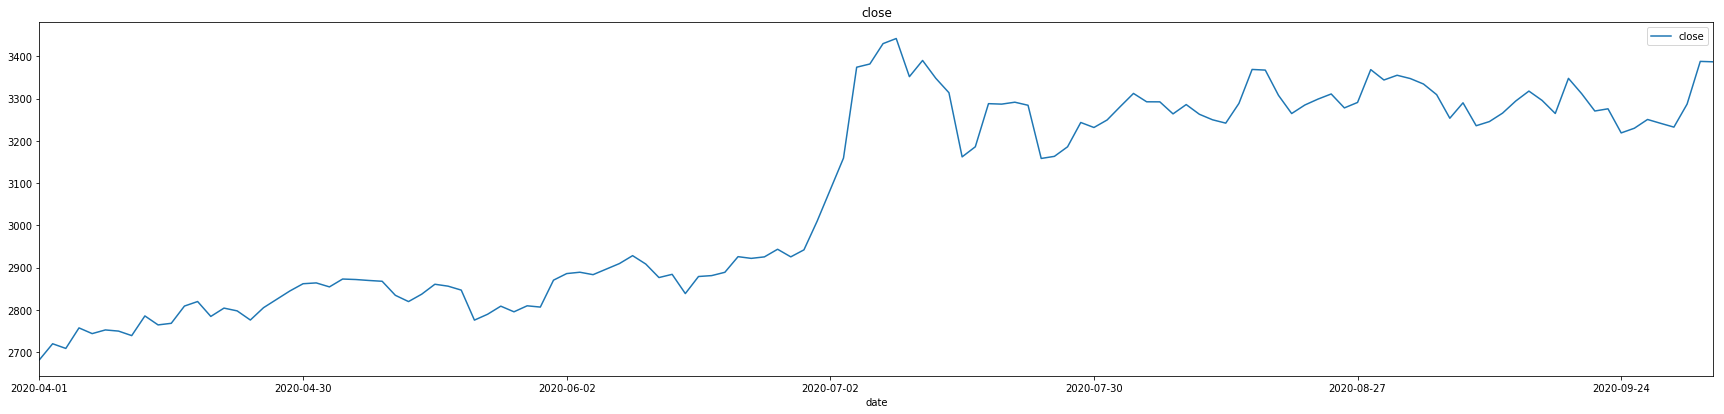

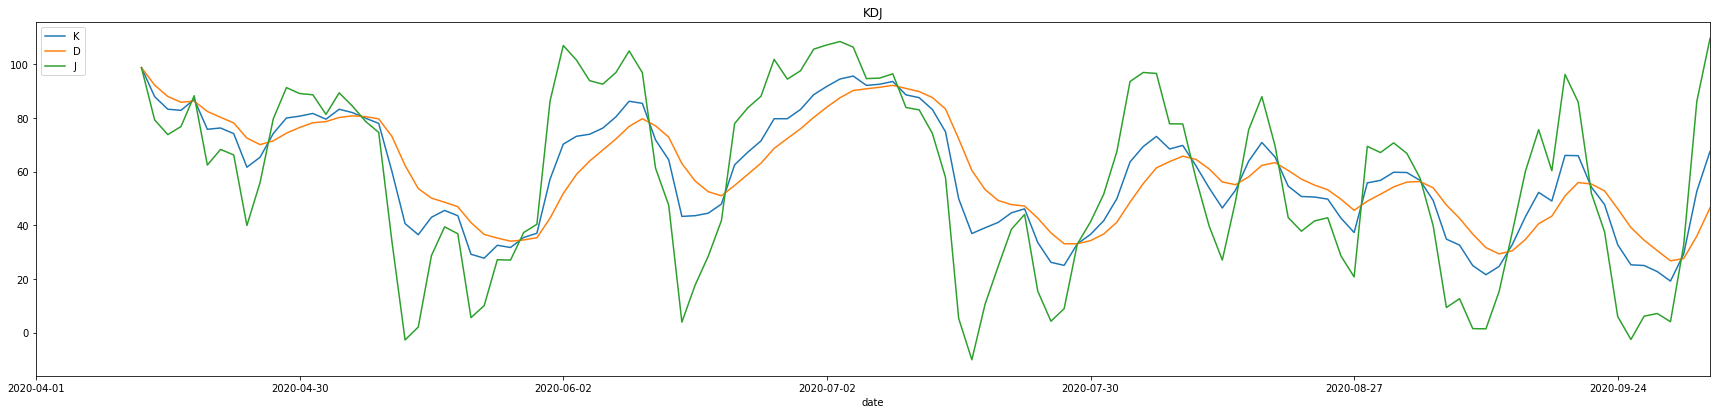

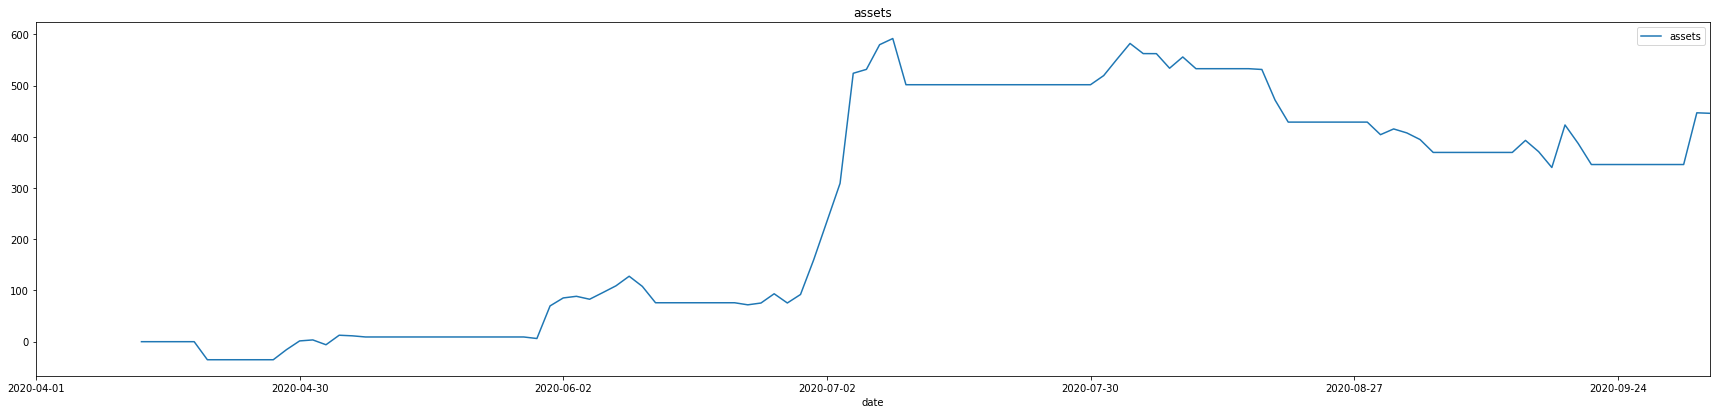

In [5]:
bs_a.k_data_plus[['close']].plot(title='close',figsize=(30, 6.5))
bs_a.k_data_plus[['K','D','J']].plot(title='KDJ',figsize=(30, 6.5))
bs_a.k_data_plus[['assets']].plot(title='assets',figsize=(30, 6.5))
plt.show()

In [11]:
bs_a.k_data_plus[['close','KDJ_x','crash','share','assets']]

,close,KDJ_x,crash,share,assets
date,,,,,
2020-04-01,2682.0795,NaN,0.0000,NaN,NaN
2020-04-02,2719.8864,NaN,0.0000,NaN,NaN
2020-04-03,2708.8246,NaN,0.0000,NaN,NaN
2020-04-07,2757.4064,NaN,0.0000,NaN,NaN
2020-04-08,2743.8865,NaN,0.0000,NaN,NaN
2020-04-09,2752.5880,NaN,0.0000,NaN,NaN
2020-04-10,2749.8466,NaN,0.0000,NaN,NaN
2020-04-13,2739.1666,NaN,0.0000,NaN,NaN
2020-04-14,2785.7200,0.0,0.0000,0.0000,0.0000
